In [43]:
import pandas as pd
data = pd.read_csv("/content/2357.TW.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,273.5,274.0,269.0,270.0,180.993896,1300586
1,2017-12-04,270.0,271.0,267.5,269.0,180.323547,992636
2,2017-12-05,269.0,269.0,267.5,268.5,179.988373,1018041
3,2017-12-06,270.5,270.5,266.5,269.5,180.658722,1181673
4,2017-12-07,269.5,269.5,265.0,265.0,177.642166,934593


In [44]:
data['Date'] =pd.to_datetime(data['Date'])
data.index= data['Date']

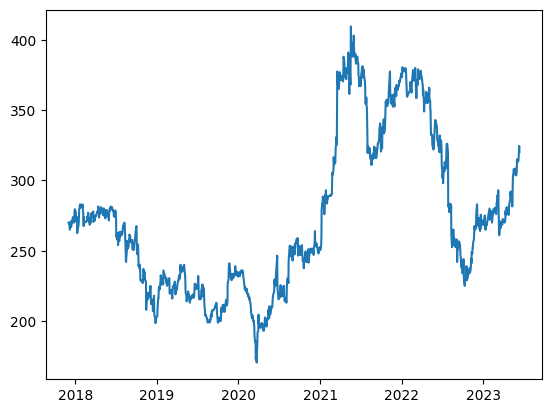

In [45]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['Close'])

In [46]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [47]:
# 2. Đọc file dữ liệu chứng khoán DELL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/2357.TW.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index



# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [48]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5411.336, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5413.726, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5415.488, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5415.436, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5411.957, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5411.826, Time=1.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5411.052, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5416.669, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5409.696, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5410.532, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5412.283, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5407.988, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5413.728, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=5408.802, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]          

In [50]:
train_data.index

RangeIndex(start=0, stop=940, step=1)

In [51]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [52]:

from datetime import timedelta

In [53]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
#last_index =  df.index[-1]
last_index=len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[333.16813707 334.0821051  334.09691906 334.01364562 334.01369689
 334.0212606  334.02112905 334.02044417 334.02046761 334.02052943
 334.02052626 334.0205207  334.02052108 334.02052158 334.02052154
 334.02052149 334.0205215  334.0205215  334.0205215  334.0205215
 334.0205215  334.0205215  334.0205215  334.0205215  334.0205215
 334.0205215  334.0205215  334.0205215  334.0205215  334.0205215 ]


In [54]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 56.51310606258599
Testing RMSE: 51.70870975256096


RMSE thường được sử dụng để đánh giá độ chính xác của mô hình dự đoán với các giá trị liên tục, như giá cổ phiếu, điểm số, nhiệt độ, v.v. Giá trị RMSE càng nhỏ, mô hình dự đoán càng chính xác. Vậy với dữ liệu này mô hình Arima chính xác hơn

Validation RMSE: 56.51310606258599
Testing RMSE: 51.70870975256096
Validation MAE: 54.40032241463773
Testing MAE: 42.37975896915344
Validation MAPE: 0.19796270482847836
Testing MAPE: 0.1485130033554969


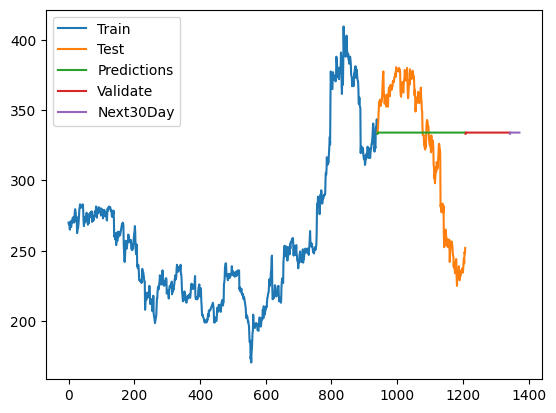

In [55]:


# 8. Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mae= np.mean(np.abs(y_pred_val - y_val))
test_mae= np.mean(np.abs(y_pred - y_test))
valid_mape= np.mean(np.abs((y_pred_val - y_val) / y_val))
test_mape= np.mean(np.abs((y_pred - y_test) /y_test))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [56]:
test_data.index

RangeIndex(start=940, stop=1208, step=1)